# **Spotify Topic Modeling and EDA**



**Project overview**

The goal of this project is to analyze song lyrics from the past 50 years and identify dominant themes using topic modeling. By extracting trends from lyrics, we can visualize how different themes have evolved across genres and time.



# Importing necessary Libraries

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('punkt_tab')

nltk.download('wordnet')
nltk.download('stopwords')

import string

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Data from: https://data.mendeley.com/datasets/3t9vbwxgr5/3

In [7]:
data = pd.read_csv('/content/tcc_ceds_music copy.csv')

In [8]:
data.head(2)

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.13711,sadness,1.0
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.26324,world/life,1.0


In [9]:
data.shape

(28372, 31)

# Exploratory Data Analysis (EDA)

The dataset contains several columns that are not relevant to our analysis. We drop unnecessary columns to focus on the lyrics, artist, track name, release date, and genre. I've also kept in the topic column so we can compare them with our newfound topics later on.

In [10]:
data.drop(['Unnamed: 0', "len", "age", "dating", "violence", "world/life", "night/time", "shake the audience",
           "family/gospel", "romantic", "communication", "obscene", "music",
           "movement/places", "light/visual perceptions", "family/spiritual",
           "like/girls", "sadness", "feelings", "danceability", "loudness",
           "acousticness", "instrumentalness", "valence", "energy"], axis=1, inplace=True)

In [11]:
data.head(5)

,artist_name,track_name,release_date,genre,lyrics,topic
0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,sadness
1,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,world/life
2,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,music
3,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,romantic
4,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,romantic


In [12]:
data.info() # to check for any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28372 entries, 0 to 28371
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   artist_name   28372 non-null  object
 1   track_name    28372 non-null  object
 2   release_date  28372 non-null  int64 
 3   genre         28372 non-null  object
 4   lyrics        28372 non-null  object
 5   topic         28372 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.3+ MB


In [13]:
data['artist_name'].value_counts().head(5) # identifying Top Artists

,count
artist_name,
johnny cash,190
ella fitzgerald,188
dean martin,146
willie nelson,131
george jones,107


In [14]:
data['topic'].value_counts() # identifying topics

,count
topic,
sadness,6096
violence,5710
world/life,5420
obscene,4882
music,2303
night/time,1825
romantic,1524
feelings,612


# LDA using TF-IDF

To prepare the lyrics for **topic modeling**, we perform text preprocessing:

- Lowercasing
- Removing punctuation
- Removing stopwords
- Lemmatization and stemming

In [15]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

stop_words = set(stopwords.words('english'))

def preprocess_lyrics(text, lemmatize=True, stem=True):
    text = text.lower().translate(str.maketrans('', '', string.punctuation))
    tokens = [word for word in word_tokenize(text) if word not in stop_words]

    if lemmatize:
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
    if stem:
        tokens = [stemmer.stem(word) for word in tokens]

    return ' '.join(tokens)


In [16]:
data['preprocessed_lyrics'] = data['lyrics'].apply(preprocess_lyrics)
data['tokens'] = data['preprocessed_lyrics'].apply(str.split)

print(data[['lyrics', 'preprocessed_lyrics', 'tokens']].head())

                                              lyrics  \
0  hold time feel break feel untrue convince spea...   
1  believe drop rain fall grow believe darkest ni...   
2  sweetheart send letter goodbye secret feel bet...   
3  kiss lips want stroll charm mambo chacha merin...   
4  till darling till matter know till dream live ...   

                                 preprocessed_lyrics  \
0  hold time feel break feel untru convinc speak ...   
1  believ drop rain fall grow believ darkest nigh...   
2  sweetheart send letter goodby secret feel bett...   
3  kiss lip want stroll charm mambo chacha mering...   
4  till darl till matter know till dream live apa...   

                                              tokens  
0  [hold, time, feel, break, feel, untru, convinc...  
1  [believ, drop, rain, fall, grow, believ, darke...  
2  [sweetheart, send, letter, goodby, secret, fee...  
3  [kiss, lip, want, stroll, charm, mambo, chacha...  
4  [till, darl, till, matter, know, till, dream, ..

Word Cloud Visualization

(-0.5, 399.5, 199.5, -0.5)

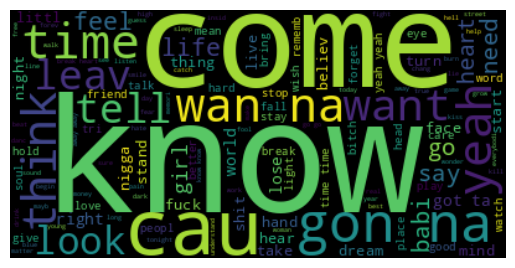

In [17]:
all_words = [word for sublist in data['tokens'] for word in sublist]

wordcloud = WordCloud().generate(' '.join(all_words))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

Feature Extraction Using TF-IDF

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=1000)
dtm = vectorizer.fit_transform(data['preprocessed_lyrics'])

# Topic Modeling Using LDA

Latent Dirichlet Allocation (LDA) is a probabilistic generative model used for topic modeling. It is an unsupervised machine learning technique that identifies hidden topics in a collection of documents (in this case, song lyrics). Each topic is represented as a distribution over words, and each document is represented as a distribution over topics.

In [19]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=9, random_state=42)     # since there are 8 topics in the original topics column, we limit LDA to 8 for now
lda.fit(dtm)

LatentDirichletAllocation(n_components=9, random_state=42)

In [20]:
for index, topic in enumerate(lda.components_):
    print(f"Topic {index}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])

Topic 0:
['eye', 'leav', 'like', 'away', 'know', 'stand', 'come', 'live', 'life', 'time']
Topic 1:
['away', 'mind', 'thing', 'live', 'know', 'good', 'better', 'life', 'time', 'chang']
Topic 2:
['come', 'insid', 'breath', 'want', 'know', 'away', 'like', 'feel', 'dead', 'head']
Topic 3:
['na', 'caus', 'know', 'money', 'yeah', 'bitch', 'shit', 'fuck', 'nigga', 'like']
Topic 4:
['rememb', 'time', 'music', 'come', 'play', 'sweet', 'hear', 'life', 'song', 'sing']
Topic 5:
['babi', 'long', 'readi', 'ta', 'got', 'wan', 'go', 'woman', 'gon', 'na']
Topic 6:
['feel', 'home', 'long', 'good', 'babi', 'time', 'right', 'blue', 'night', 'tonight']
Topic 7:
['fight', 'hand', 'know', 'soul', 'lord', 'life', 'come', 'black', 'live', 'world']
Topic 8:
['feel', 'leav', 'time', 'break', 'dream', 'fall', 'hold', 'away', 'know', 'heart']


In [21]:
topic_results = lda.transform(dtm)
data['dominant_topic'] = topic_results.argmax(axis=1)

In [22]:
# Defining topic-to-theme mapping for ease of understanding
topic_to_theme = {
    0: 'Life and Time',
    1: 'Seasons and Nature',
    2: 'Darkness and Death',
    3: 'Heartbreak and Pain',
    4: 'Nightlife and Romance',
    5: 'Explicit and Gritty',
    6: 'Music and Celebration',
    7: 'Struggle and Survival',
    8: 'Romance and Intimacy',
    9: 'Conflict and Redemption'
}

data['topic_theme'] = data['dominant_topic'].map(topic_to_theme)
print(data[['lyrics', 'dominant_topic', 'topic_theme']].head())

                                              lyrics  dominant_topic  \
0  hold time feel break feel untrue convince spea...               2   
1  believe drop rain fall grow believe darkest ni...               7   
2  sweetheart send letter goodbye secret feel bet...               8   
3  kiss lips want stroll charm mambo chacha merin...               8   
4  till darling till matter know till dream live ...               8   

             topic_theme  
0     Darkness and Death  
1  Struggle and Survival  
2   Romance and Intimacy  
3   Romance and Intimacy  
4   Romance and Intimacy  


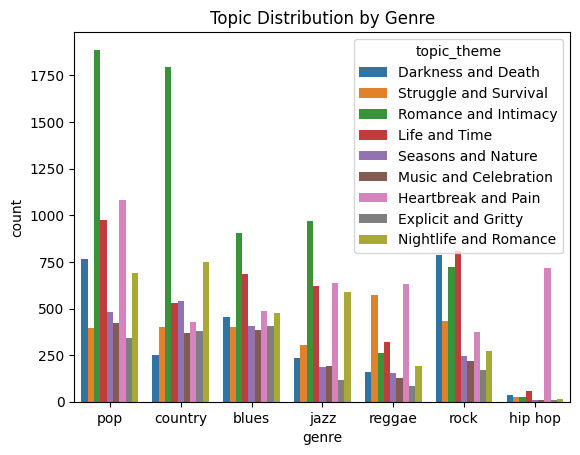

In [23]:
# Plot the distribution of topics across genres
sns.countplot(x='genre', hue='topic_theme', data=data)
plt.title('Topic Distribution by Genre')
plt.show()

<Axes: xlabel='release_date', ylabel='dominant_topic'>

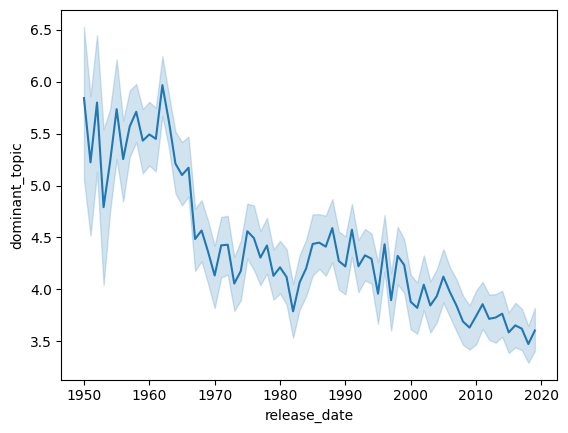

In [25]:
sns.lineplot(x='release_date', y='dominant_topic', data=data)